In [144]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import normalize
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)


In [2]:
battles = pd.read_csv('battles.csv')
character_deaths = pd.read_csv('character-deaths.csv')
character_predictions = pd.read_csv('character-predictions.csv')

In [112]:
# start with character_predictions as main df
df = character_predictions

# add calculated cols: num_books, culture, 
df.loc[:, "num_books"] = df[[x for x in df.columns if x.startswith("book")]].sum(axis = 1)

cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

def get_cult(value):
    value = value.lower()
    v = [k for (k, v) in cult.items() if value in v]
    return v[0] if len(v) > 0 else value.title()

df.loc[:, "culture"] = [get_cult(x) for x in df.culture.fillna("")]

# convert 'house' and 'name' to string
df['house'] = df['house'].astype(str)
df['name'] = df['name'].astype(str)

# add col to see if character's name also appears in the house name
name_check=[]

for i in range(len(df)):
    name_set = set(df.ix[i,'name'].split(' '))
    house_set = set(df.ix[i,'house'].split(' '))
    name_check.append(int(bool(name_set&house_set)))
    
df['name_in_house'] = name_check

In [110]:
# get rid of previous prediction information from source data; we're going to make our own predictions!
df.drop(['S.No','actual','pred','alive','plod'],axis=1,inplace=True)

In [145]:
# compute null accuracy rate
y = df.isAlive
na_rate = y.mean()

## Model 1: Logistic Regression
TODO: Normalize column values, cross validation, tune model, ROC/AUC

accuracy: 0.762076053443
compared to null accuracy rate of 0.745632065776

Confusion Matrix:
[[  95  400]
 [  63 1388]]


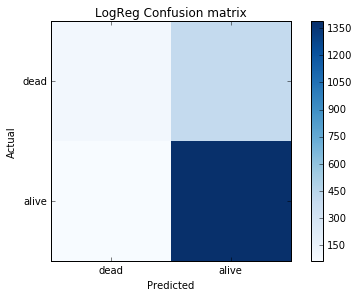

sensitivity (if alive, chance we predicted correctly): 0.956581667815
specificity (if dead, chance we predicted correctly): 0.191919191919


In [148]:
# Model 1: Logistic Regression

logreg = LogisticRegression()
feature_cols = ['male','book1','book2','book3','book4','book5','isMarried','isNoble','popularity','name_in_house']
X = df[feature_cols]
logreg.fit(X, y)
print 'accuracy: ' + str(logreg.score(X,y))
print 'compared to null accuracy rate of '+str(na_rate)

preds = logreg.predict(X)
logreg_cm = metrics.confusion_matrix(y, preds)
print '\nConfusion Matrix:'
print logreg_cm

'''
top left: predicted dead, actually died
bottom left: predicted dead, actually alive
top right: predicted alive, actually dead
bottom right: predicted alive, actually alive
'''

#logreg confusion matrix
def plot_confusion_matrix(cm, order, title='LogReg Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(order))
    plt.xticks(tick_marks, order, rotation=0)
    plt.yticks(tick_marks, order)
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

plt.figure()
plot_confusion_matrix(logreg_cm,['dead','alive'])
plt.show()

sensitivity = 1.*logreg_cm[1,1]/sum(logreg_cm[1,:])
print 'sensitivity (if alive, chance we predicted correctly): ' + str(sensitivity)

specificity = 1.*logreg_cm[0,0]/sum(logreg_cm[0,:])
print 'specificity (if dead, chance we predicted correctly): ' + str(specificity)

## Model 2: Decision Tree / Random Forest

## Model 3: Bayesian

## OLD CODE NOT IN USE

In [ ]:
'''
def died(df):
    if np.isnan(df['Death Year']) and np.isnan(df['Book of Death']) and np.isnan(df['Death Chapter']):
        return False
    else:
        return True

character_deaths['died'] = character_deaths.apply(died,axis=1)
'''